0.7071067811865476 0.7853981633974483
0.6954872891182903 0.7853981633974483
0.6276389238335802 1.413716694115407
0.5107365050439594 1.413716694115407
0.4312624933369897 1.413716694115407
0.37738023490928396 1.413716694115407
0.3363191284478347 1.413716694115407
0.3039249674528331 1.413716694115407
0.2773560808323068 1.413716694115407
0.2550406812229193 1.413716694115407
0.235919423698834 1.413716694115407


<IPython.core.display.Javascript object>


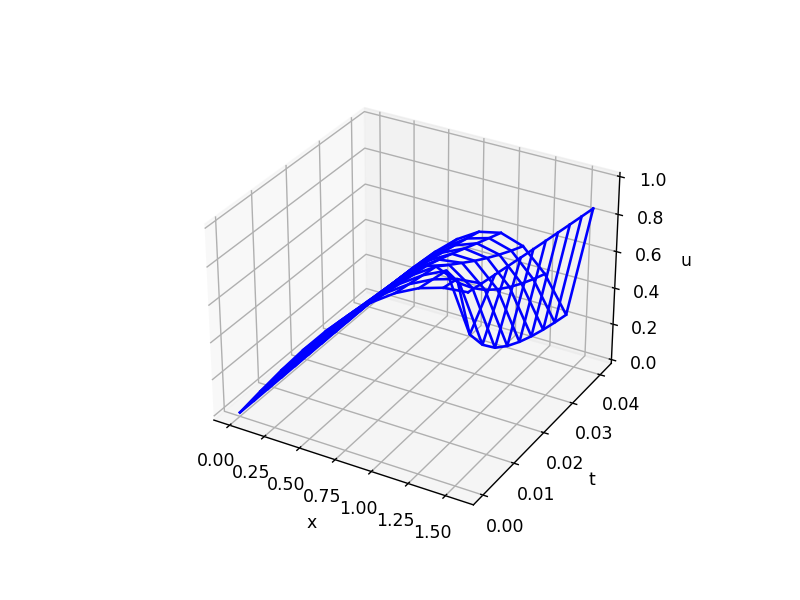

In [3]:
%matplotlib notebook

import math
import numpy as np
import matplotlib.pyplot as plt

# Initial data
a = 2
b = 0
c = -2
N = 10
K = 10
L = math.pi / 2
h = L / N
t = (h*h) / 6
T = t * K

first = (a/(h*h)) + b/h
second = ((1/t) - ((2*a)/(h*h)) - (b/h) + c)
third = a/(h*h)

u_mesh = np.zeros((N + 1, K + 1))  # Finite-difference mesh


def draw_u(u):
    x = [h * i for i in range(N + 1)] * (K + 1)

    y = np.zeros((N + 1) * (K + 1))
    i = 0
    j = 0
    while i < (N + 1) * (K + 1):
        y[i] = t * j
        i += 1
        if i % (N + 1) == 0:
            j += 1

    z = np.zeros((N + 1) * (K + 1))
    k = 0
    n = 0
    for i in range((N + 1) * (K + 1)):
        z[i] = u[n][k]
        n += 1
        if n % (N + 1) == 0:
            n = 0
            k += 1

    x2 = np.zeros((N + 1) * (K + 1))
    i = 0
    j = 0
    while i < (N + 1) * (K + 1):
        x2[i] = h * j
        i += 1
        if i % (K + 1) == 0:
            j += 1

    y2 = [t * i for i in range(K + 1)] * (N + 1)

    z2 = np.zeros((N + 1) * (K + 1))
    i = 0
    j = 0
    r = 0
    while r < (N + 1) * (K + 1):
        z2[r] = z[i*(N+1) + j]
        r += 1
        i += 1
        if r % (K + 1) == 0:
            i = 0
            j += 1

    ax = plt.axes(projection="3d")
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u')
    for i in range(K + 1):
        ax.plot(x[(N+1)*i:(N+1)*(i+1)], y[(N+1)*i:(N+1)*(i+1)], z[(N+1)*i:(N+1)*(i+1)], 'blue')
    for i in range(N + 1):
        ax.plot(x2[(K+1)*i:(K+1)*(i+1)], y2[(K+1)*i:(K+1)*(i+1)], z2[(K+1)*i:(K+1)*(i+1)], 'blue')
    plt.show()


def create_u(u):
    for j in range(N + 1):  # Initial condition
        u[j][0] = math.sin(j*h)

    for k in range(K):
        for j in range(1, N):
            u[j][k+1] = (u[j+1][k] * first + u[j][k] * second + u[j-1][k] * third) * t

    for k in range(1, K + 1):  # Boundary conditions
        u[0][k] = u[1][k] - math.exp((c - a) * k*t) * h
        u[N][k] = math.exp((c - a) * k*t)

    for j in range(N + 1):
        min  = 999
        x = 0
        for i in range(int((N + 1) / 2), N + 1):
            if u[i][j] < min:
                min = u[i][j]
                x = i
        print(min, L / N * x)
        
    
    #print(np.around(u, 3))
    draw_u(u)


create_u(u_mesh)